How have housing prices changed since 2000?  

The dataset below will be analyzed to determine how housing prices have changed since 2000.

Zillow Home Value Index Dataset: This dataset contains information about home values in various regions in the US, including the median home value and the percentage of homes that are currently underwater. It can be downloaded from Zillow at https://www.zillow.com/research/data/.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns



Read in the Zillow dataset. 

In [ ]:
housing = pd.read_csv("housing_data.csv")

In [ ]:
housing.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023
0,102001,0,United States,country,NaN,112815.8846,113014.2978,113260.2096,113787.5224,114394.2744,...,334961.6163,337453.6009,337928.5273,336814.2136,335753.5555,334897.2534,333798.5139,333158.3635,333102.5790,334268.6832
1,394913,1,"New York, NY",msa,NY,179016.8663,179778.7012,180546.4111,182101.2548,183708.2684,...,566539.0363,570564.7313,571640.4604,569836.4594,567766.7264,566031.0287,563685.3601,563651.5730,564812.4855,568543.1999
2,753899,2,"Los Angeles, CA",msa,CA,225229.7510,226062.8529,227175.9719,229409.9883,231860.8782,...,920841.3304,922587.8656,919215.5893,913193.1383,907774.5240,904032.3499,899652.3267,891231.3120,880994.3908,873619.3533
3,394463,3,"Chicago, IL",msa,IL,140260.9356,140393.9230,140644.1876,141267.7409,142016.4855,...,290308.5414,290720.1463,290078.4071,288473.4110,287194.8888,286510.1853,285844.9507,286411.9165,287467.4534,289343.7309
4,394514,4,"Dallas, TX",msa,TX,128720.9575,128785.3706,128858.1631,129040.2662,129272.9105,...,379303.7183,382090.5955,382118.8825,380156.3521,378076.3474,376171.6576,373642.7983,371065.1659,368975.5169,368252.4090


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 284 entries, RegionID to 3/31/2023
dtypes: float64(279), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
housing.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000',
       ...
       '6/30/2022', '7/31/2022', '8/31/2022', '9/30/2022', '10/31/2022',
       '11/30/2022', '12/31/2022', '1/31/2023', '2/28/2023', '3/31/2023'],
      dtype='object', length=284)

###Melt method 

The melt method was used to reshape the dataset to long format. The long format will enable the data to be analyzed.

In [ ]:
housing_melted = housing.melt(id_vars= housing.columns[:5],value_vars= housing.columns[5:], var_name = "Date", value_name = "price")

In [ ]:
housing_melted.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,price
0,102001,0,United States,country,NaN,1/31/2000,112815.88460
1,394913,1,"New York, NY",msa,NY,1/31/2000,179016.86630
2,753899,2,"Los Angeles, CA",msa,CA,1/31/2000,225229.75100
3,394463,3,"Chicago, IL",msa,IL,1/31/2000,140260.93560
4,394514,4,"Dallas, TX",msa,TX,1/31/2000,128720.95750
5,394692,5,"Houston, TX",msa,TX,1/31/2000,117733.84950
6,395209,6,"Washington, DC",msa,VA,1/31/2000,177168.17170
7,394974,7,"Philadelphia, PA",msa,PA,1/31/2000,113418.92020
8,394856,8,"Miami, FL",msa,FL,1/31/2000,106374.89850
9,394347,9,"Atlanta, GA",msa,GA,1/31/2000,139944.71760


In [ ]:
housing_melted.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'Date',
       'price'],
      dtype='object')

### Null Values 

The isnull method was used to determine if any null values were prsent. There were 279 null values identified in the state columns and were dropped with the dropna method. 


In [ ]:
housing_melted.isnull().sum()

RegionID          0
SizeRank          0
RegionName        0
RegionType        0
StateName       279
Date              0
price         49271
dtype: int64

In [ ]:
housing_clean = housing_melted.dropna()

In [ ]:
housing_clean.isnull().sum()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
Date          0
price         0
dtype: int64

In [ ]:
housing_clean.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,price
1,394913,1,"New York, NY",msa,NY,1/31/2000,179016.86630
2,753899,2,"Los Angeles, CA",msa,CA,1/31/2000,225229.75100
3,394463,3,"Chicago, IL",msa,IL,1/31/2000,140260.93560
4,394514,4,"Dallas, TX",msa,TX,1/31/2000,128720.95750
5,394692,5,"Houston, TX",msa,TX,1/31/2000,117733.84950
6,395209,6,"Washington, DC",msa,VA,1/31/2000,177168.17170
7,394974,7,"Philadelphia, PA",msa,PA,1/31/2000,113418.92020
8,394856,8,"Miami, FL",msa,FL,1/31/2000,106374.89850
9,394347,9,"Atlanta, GA",msa,GA,1/31/2000,139944.71760
10,394404,10,"Boston, MA",msa,MA,1/31/2000,207538.46960


In [ ]:
housing_clean = housing_melted.dropna().copy()


In [ ]:
housing_clean['Date'] = pd.to_datetime(housing_clean['Date'])


Boolean indexing for New York, California, Texas and Arkansas 

In [ ]:
New_york = housing_clean[housing_clean["StateName"] == "NY"].copy()

###Determining housing prices by region and by year 

1. Create our region column 
2. Groupby region column and year column
3. Take the mean of housing price 

Using the datetime method to make the year searchable. 

In [ ]:
housing_clean['year'] = housing_clean['Date'].dt.year

Calculated the mean, grouped by state and year.



In [ ]:
housing_clean.groupby(['StateName','year']).mean()

<ipython-input-18-0c530e77be5c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing_clean.groupby(['StateName','year']).mean()


RegionID    SizeRank          price
StateName year                                          
AK        2000  394327.000000  139.000000  134189.184000
          2001  394327.000000  139.000000  155108.484000
          2002  394327.000000  139.000000  169748.126200
          2003  394327.000000  139.000000  178241.803308
          2004  394327.000000  139.000000  191461.299525
...                       ...         ...            ...
WY        2019  394750.111111  664.555556  275622.885682
          2020  394750.111111  664.555556  296162.399320
          2021  394750.111111  664.555556  338362.743263
          2022  394750.111111  664.555556  390654.614402
          2023  394750.111111  664.555556  401412.143963

[1173 rows x 3 columns]

In [ ]:
AR_housing = housing_clean[housing_clean['StateName'] == 'AR'].groupby(['StateName', 'year']).mean()


<ipython-input-19-0e971f5c8587>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AR_housing = housing_clean[housing_clean['StateName'] == 'AR'].groupby(['StateName', 'year']).mean()


In [ ]:
CA_housing = housing_clean[housing_clean['StateName'] == 'CA'].groupby(['StateName', 'year']).mean()


<ipython-input-20-7f61180bd289>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_housing = housing_clean[housing_clean['StateName'] == 'CA'].groupby(['StateName', 'year']).mean()


In [ ]:
TX_housing = housing_clean[housing_clean['StateName'] == 'TX'].groupby(['StateName', 'year']).mean()


In [ ]:
NY_housing = housing_clean[housing_clean['StateName'] == 'NY'].groupby(['StateName', 'year']).mean(numeric_only=True)


### Average housing prices in Arkansas since 2000 

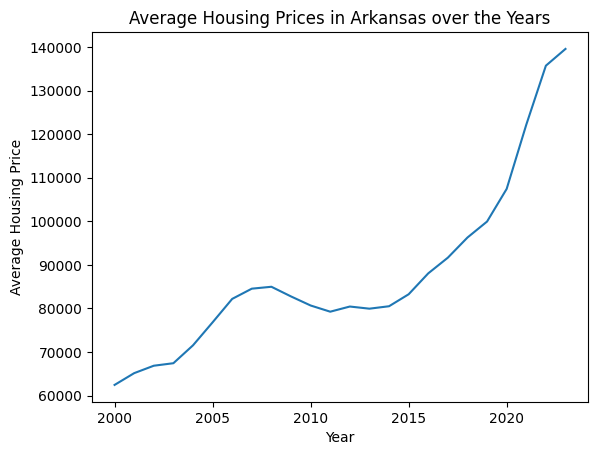

In [ ]:
years = AR_housing.index.get_level_values('year')
prices = AR_housing['price']

# Create the line plot
plt.plot(years, prices)
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Prices in Arkansas over the Years')
plt.show()

Average housing prices in California, Texas, Arkansas and New York.

California has significant higher housing prices compared to the other states. 

<ipython-input-24-d8c81ed94422>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AR_housing = housing_clean[housing_clean['StateName'] == 'AR'].groupby(['StateName', 'year']).mean()
<ipython-input-24-d8c81ed94422>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_housing = housing_clean[housing_clean['StateName'] == 'CA'].groupby(['StateName', 'year']).mean()
<ipython-input-24-d8c81ed94422>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be va

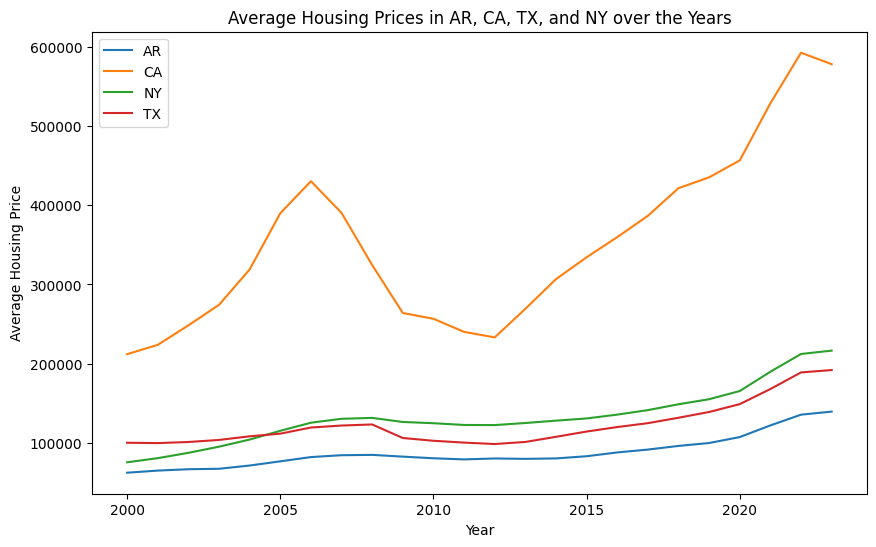

In [ ]:
AR_housing = housing_clean[housing_clean['StateName'] == 'AR'].groupby(['StateName', 'year']).mean()
CA_housing = housing_clean[housing_clean['StateName'] == 'CA'].groupby(['StateName', 'year']).mean()
TX_housing = housing_clean[housing_clean['StateName'] == 'TX'].groupby(['StateName', 'year']).mean()
NY_housing = housing_clean[housing_clean['StateName'] == 'NY'].groupby(['StateName', 'year']).mean()

# Combine the data into one DataFrame
combined_data = pd.concat([AR_housing, CA_housing, TX_housing, NY_housing])

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for state, data in combined_data.groupby('StateName'):
    years = data.index.get_level_values('year')
    prices = data['price']
    plt.plot(years, prices, label=state)

plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Prices in AR, CA, TX, and NY over the Years')
plt.legend()
plt.show()
#In the code above, we first filter and group the data for each state using the groupby() and mean() functions, similar to what you provided. Then, we combine the data into one DataFrame using pd.concat().

#Next, we create a line plot by iterating over the combined data grouped by 'StateName'. For each state, we extract the years and prices, and plot them using plt.plot(). We set the x-axis label, y-axis label, and title for the plot, and enable the legend to show the state labels. Finally, we display the plot using plt.show().

#Make sure to have the necessary libraries imported, such as Pandas and Matplotlib, and adjust the column names based on your specific DataFrame structure.








In [ ]:
housing_clean.groupby(['year']).mean()

<ipython-input-25-ffc6d7d66e98>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing_clean.groupby(['year']).mean()


,RegionID,SizeRank,price
year,,,
2000,413570.152968,362.086948,102487.884873
2001,412861.255975,361.092866,110657.463452
2002,412206.445511,358.317867,117376.553316
2003,413026.919008,357.199098,125487.117004
2004,412666.408796,361.373647,135791.354771
2005,412504.817932,359.556563,151790.417079
2006,411961.936358,365.467637,163671.452373
2007,411623.185207,369.138304,165411.196353
2008,412033.322398,370.420671,156988.801708


###New York housing prices by year 


In [ ]:
# Create a list to store the data for each year
new_york_data = []

# Iterate through the years from 2000 to 2022
for year in range(2000, 2023):
    # Filter the housing_clean dataframe for New York and the current year
    data = housing_clean[(housing_clean["StateName"] == "NY") & (housing_clean['year'] == year)].copy()
    # Append the filtered data to the list
    new_york_data.append(data)

# Assign the variables dynamically using dictionary comprehension
new_york_years = {year: data for year, data in zip(range(2000, 2023), new_york_data)}


###California housing prices by year 

In [ ]:
# Create a list to store the data for each year
california_data = []

# Iterate through the years from 2000 to 2022
for year in range(2000, 2023):
    # Filter the housing_clean dataframe for California and the current year
    data = housing_clean[(housing_clean["StateName"] == "CA") & (housing_clean['year'] == year)].copy()
    # Append the filtered data to the list
    california_data.append(data)

# Assign the variables dynamically using dictionary comprehension
california_years = {year: data for year, data in zip(range(2000, 2023), california_data)}


###Texas housing prices by year

In [ ]:
# Create a list to store the data for each year
texas_data = []

# Iterate through the years from 2000 to 2022
for year in range(2000, 2023):
    # Filter the housing_clean dataframe for Texas and the current year
    data = housing_clean[(housing_clean["StateName"] == "TX") & (housing_clean['year'] == year)].copy()
    # Append the filtered data to the list
    texas_data.append(data)

# Assign the variables dynamically using dictionary comprehension
texas_years = {year: data for year, data in zip(range(2000, 2023), texas_data)}


###Arkansas housing prices by year

In [ ]:
# Create a list to store the data for each year
arkansas_data = []

# Iterate through the years from 2000 to 2022
for year in range(2000, 2023):
    # Filter the housing_clean dataframe for Arkansas and the current year
    data = housing_clean[(housing_clean["StateName"] == "AR") & (housing_clean['year'] == year)].copy()
    # Append the filtered data to the list
    arkansas_data.append(data)

# Assign the variables dynamically using dictionary comprehension
arkansas_years = {year: data for year, data in zip(range(2000, 2023), arkansas_data)}


In [ ]:
Cali = housing_clean[housing_clean["StateName"] == "CA"].copy()

In [ ]:
Texas = housing_clean[housing_clean["StateName"] == "TX"].copy()

In [ ]:
Arkansas = housing_clean[housing_clean["StateName"] == "AR"].copy()

In [ ]:
NY_housing.head()

RegionID    SizeRank          price
StateName year                                          
NY        2000  394732.500000  372.038462   75617.917889
          2001  394732.500000  372.038462   80842.098560
          2002  394730.448052  371.785714   87542.935795
          2003  394732.306931  369.425743   95306.875286
          2004  394732.164516  371.890323  104279.623109

In [ ]:
city_to_region_NY = {
    'New York, NY': 'New York City Area',
    'Buffalo, NY': 'Western NY',
    'Rochester, NY': 'Western NY',
    'Albany, NY': 'Capital Region',
    'Syracuse, NY': 'Central NY',
    'Utica, NY': 'Central NY',
    'Binghamton, NY': 'Southern Tier',
    'Kingston, NY': 'Hudson Valley',
    'Jamestown, NY': 'Western NY',
    'Glens Falls, NY': 'North Country',
    'Watertown, NY': 'North Country',
    'Ogdensburg, NY': 'North Country',
    'Ithaca, NY': 'Central NY',
    'Corning, NY': 'Southern Tier',
    'Elmira, NY': 'Southern Tier',
    'Plattsburgh, NY': 'North Country',
    'Olean, NY': 'Western NY',
    'Auburn, NY': 'Central NY',
    'Hudson, NY': 'Hudson Valley',
    'Oneonta, NY': 'Central NY',
    'Batavia, NY': 'Western NY',
    'Gloversville, NY': 'Capital Region',
    'Amsterdam, NY': 'Capital Region',
    'Malone, NY': 'North Country',
    'Cortland, NY': 'Central NY',
    'Seneca Falls, NY': 'Central NY'
}


In [ ]:
New_york['Region'] = New_york['RegionName'].map(city_to_region_NY)

In [ ]:
Cali["RegionName"].unique()

array(['Los Angeles, CA', 'San Francisco, CA', 'Riverside, CA',
       'San Diego, CA', 'Sacramento, CA', 'San Jose, CA', 'Fresno, CA',
       'Bakersfield, CA', 'Oxnard, CA', 'Stockton, CA', 'Modesto, CA',
       'Santa Rosa, CA', 'Visalia, CA', 'Vallejo, CA', 'Santa Maria, CA',
       'Salinas, CA', 'San Luis Obispo, CA', 'Santa Cruz, CA',
       'Redding, CA', 'Napa, CA', 'Merced, CA', 'Chico, CA',
       'El Centro, CA', 'Hanford, CA', 'Eureka, CA', 'Truckee, CA',
       'Madera, CA', 'Ukiah, CA', 'Yuba City, CA', 'Clearlake, CA',
       'Susanville, CA', 'Crescent City, CA', 'Red Bluff, CA',
       'Sonora, CA'], dtype=object)

In [ ]:
city_to_region_CA = {
    'Los Angeles, CA': 'Southern CA',
    'San Francisco, CA': 'Bay Area',
    'Riverside, CA': 'Southern CA',
    'San Diego, CA': 'Southern CA',
    'Sacramento, CA': 'Northern CA',
    'San Jose, CA': 'Bay Area',
    'Fresno, CA': 'Central Valley',
    'Bakersfield, CA': 'Central Valley',
    'Oxnard, CA': 'Southern CA',
    'Stockton, CA': 'Northern CA',
    'Modesto, CA': 'Northern CA',
    'Santa Rosa, CA': 'Northern CA',
    'Visalia, CA': 'Central Valley',
    'Vallejo, CA': 'Northern CA',
    'Santa Maria, CA': 'Southern CA',
    'Salinas, CA': 'Central Coast',
    'San Luis Obispo, CA': 'Central Coast',
    'Santa Cruz, CA': 'Central Coast',
    'Redding, CA': 'Northern CA',
    'Napa, CA': 'Northern CA',
    'Merced, CA': 'Central Valley',
    'Chico, CA': 'Northern CA',
    'El Centro, CA': 'Southern CA',
    'Hanford, CA': 'Central Valley',
    'Eureka, CA': 'Northern CA',
    'Truckee, CA': 'Northern CA',
    'Madera, CA': 'Central Valley',
    'Ukiah, CA': 'Northern CA',
    'Yuba City, CA': 'Northern CA',
    'Clearlake, CA': 'Northern CA',
    'Susanville, CA': 'Northern CA',
    'Crescent City, CA': 'Northern CA',
    'Red Bluff, CA': 'Northern CA',
    'Sonora, CA': 'Northern CA'
}


In [ ]:
Cali['Region'] = Cali['RegionName'].map(city_to_region_CA)

In [ ]:
city_to_region_TX = {
    'Dallas, TX': 'North TX',
    'Houston, TX': 'Southeast TX',
    'San Antonio, TX': 'South TX',
    'Austin, TX': 'Central TX',
    'El Paso, TX': 'West TX',
    'Lubbock, TX': 'Northwest TX',
    'Longview, TX': 'East TX',
    'Texarkana, TX': 'Northeast TX',
    'Lufkin, TX': 'East TX',
    'Brownsville, TX': 'South TX',
    'Corpus Christi, TX': 'South TX',
    'Beaumont, TX': 'Southeast TX',
    'Kerrville, TX': 'South TX',
    'McAllen, TX': 'South TX',
    'Killeen, TX': 'Central TX',
    'Waco, TX': 'Central TX',
    'Amarillo, TX': 'Northwest TX',
    'Laredo, TX': 'South TX',
    'College Station, TX': 'Southeast TX',
    'Tyler, TX': 'East TX',
    'Abilene, TX': 'West TX',
    'Midland, TX': 'West TX',
    'Odessa, TX': 'West TX',
    'Wichita Falls, TX': 'North TX',
    'Athens, TX': 'East TX',
    'Huntsville, TX': 'Southeast TX',
    'Nacogdoches, TX': 'East TX',
    'Eagle Pass, TX': 'South TX',
    'Del Rio, TX': 'South TX',
    'Stephenville, TX': 'North TX',
    'Brownwood, TX': 'Central TX',
    'Plainview, TX': 'Northwest TX',
    'Palestine, TX': 'East TX',
    'Corsicana, TX': 'North TX',
    'Jacksonville, TX': 'East TX',
    'Paris, TX': 'Northeast TX',
    'Alice, TX': 'South TX',
    'Gainesville, TX': 'North TX',
    'Kingsville, TX': 'South TX',
    'Mineral Wells, TX': 'North TX',
    'Levelland, TX': 'Northwest TX',
    'Borger, TX': 'Northwest TX',
    'Snyder, TX': 'West TX',
    'Bay City, TX': 'Southeast TX',
    'Brenham, TX': 'Southeast TX',
    'Fredericksburg, TX': 'Central TX',
    'Rio Grande City, TX': 'South TX',
    'Mount Pleasant, TX': 'Northeast TX',
    'El Campo, TX': 'Southeast TX',
    'Port Lavaca, TX': 'Southeast TX',
    'Andrews, TX': 'West TX',
    'Sweetwater, TX': 'West TX',
    'Uvalde, TX': 'South TX',
    'Vernon, TX': 'North TX',
    'Pampa, TX': 'Northwest TX',
    'Zapata, TX': 'South TX',
    'Lamesa, TX': 'West TX',
    'Sherman, TX': 'North TX',
    'Big Spring, TX': 'West TX',
    'Beeville, TX': 'South TX',
}

In [ ]:
Texas['Region'] = Texas['RegionName'].map(city_to_region_TX)

In [ ]:
Texas["RegionName"].unique()

array(['Dallas, TX', 'Houston, TX', 'San Antonio, TX', 'Austin, TX',
       'El Paso, TX', 'Lubbock, TX', 'Longview, TX', 'Texarkana, TX',
       'Lufkin, TX', 'Brownsville, TX', 'Corpus Christi, TX',
       'Beaumont, TX', 'Kerrville, TX', 'McAllen, TX', 'Killeen, TX',
       'Waco, TX', 'Amarillo, TX', 'Laredo, TX', 'College Station, TX',
       'Tyler, TX', 'Abilene, TX', 'Midland, TX', 'Odessa, TX',
       'Wichita Falls, TX', 'Athens, TX', 'Huntsville, TX',
       'Nacogdoches, TX', 'Eagle Pass, TX', 'Del Rio, TX',
       'Stephenville, TX', 'Brownwood, TX', 'Plainview, TX',
       'Palestine, TX', 'Corsicana, TX', 'Jacksonville, TX', 'Paris, TX',
       'Alice, TX', 'Gainesville, TX', 'Kingsville, TX',
       'Mineral Wells, TX', 'Levelland, TX', 'Borger, TX', 'Snyder, TX',
       'Bay City, TX', 'Brenham, TX', 'Fredericksburg, TX',
       'Rio Grande City, TX', 'Mount Pleasant, TX', 'El Campo, TX',
       'Port Lavaca, TX', 'Andrews, TX', 'Sweetwater, TX', 'Uvalde, TX',
       '

In [ ]:
city_to_region_AR = {
    'Little Rock, AR': 'Central AR',
    'Fayetteville, AR': 'Northwest AR',
    'Fort Smith, AR': 'West AR',
    'Jonesboro, AR': 'Northeast AR',
    'Hot Springs, AR': 'Central AR',
    'Pine Bluff, AR': 'Southeast AR',
    'Russellville, AR': 'Central AR',
    'Searcy, AR': 'Central AR',
    'Batesville, AR': 'North AR',
    'Paragould, AR': 'Northeast AR',
    'Harrison, AR': 'North AR',
    'Mountain Home, AR': 'North AR',
    'Blytheville, AR': 'Northeast AR',
    'Malvern, AR': 'Central AR',
    'Camden, AR': 'South AR',
    'Forrest City, AR': 'East AR',
    'Magnolia, AR': 'South AR',
    'Arkadelphia, AR': 'Southwest AR',
    'El Dorado, AR': 'South AR',
    'Helena, AR': 'East AR'
}


In [ ]:
Arkansas['Region'] = Arkansas['RegionName'].map(city_to_region_AR)

In [ ]:
Arkansas["RegionName"].unique()

array(['Little Rock, AR', 'Fayetteville, AR', 'Fort Smith, AR',
       'Jonesboro, AR', 'Hot Springs, AR', 'Pine Bluff, AR',
       'Russellville, AR', 'Searcy, AR', 'Batesville, AR',
       'Paragould, AR', 'Harrison, AR', 'Mountain Home, AR',
       'Blytheville, AR', 'Malvern, AR', 'Camden, AR', 'Forrest City, AR',
       'Magnolia, AR', 'Arkadelphia, AR', 'El Dorado, AR', 'Helena, AR'],
      dtype=object)

###New York average housing prices by region

The average New York City region is $560,000 in 2022. This is significantly more expensive than the other regions.

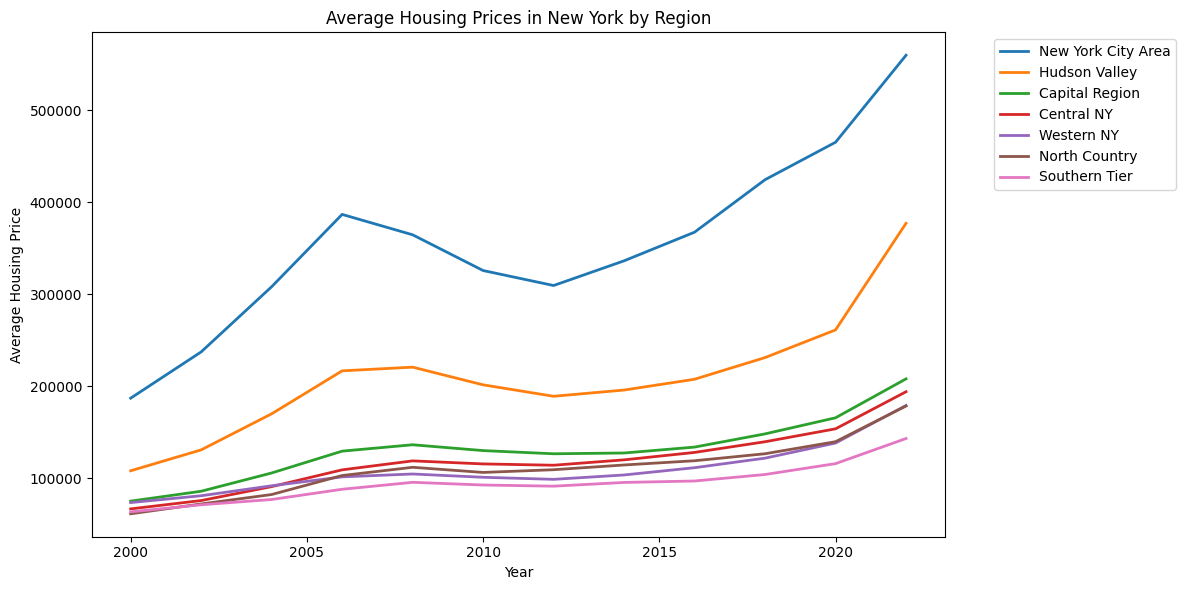

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]
regions = list(set(city_to_region_NY.values()))

# Initializing a dictionary to store average prices by region and year
avg_prices_by_region = {region: [] for region in regions}

# Calculating the average prices
for year in years:
    # Filter the data for the current year
    df_year = housing_clean[(housing_clean["StateName"] == "NY") & (housing_clean['year'] == year)].copy()

    # Map each region to the city
    df_year['Region'] = df_year['RegionName'].map(city_to_region_NY)

    # Calculate the mean price for each region
    for region in regions:
        avg_prices_by_region[region].append(df_year[df_year['Region'] == region]['price'].mean())

# Plotting
fig, ax = plt.subplots(figsize=(12,6))  # Increase the width of the figure

# Line styles for better distinction
line_styles = ['-', '--', '-.', ':']

# Order regions by the last year's average price, from highest to lowest
sorted_regions = sorted(regions, key=lambda region: avg_prices_by_region[region][-1], reverse=True)

for i, region in enumerate(sorted_regions):
    ax.plot(years, avg_prices_by_region[region], label=region, linewidth=2)

ax.set_xlabel('Year')
ax.set_ylabel('Average Housing Price')
ax.set_title('Average Housing Prices in New York by Region')

# Move the legend outside of the plot area
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


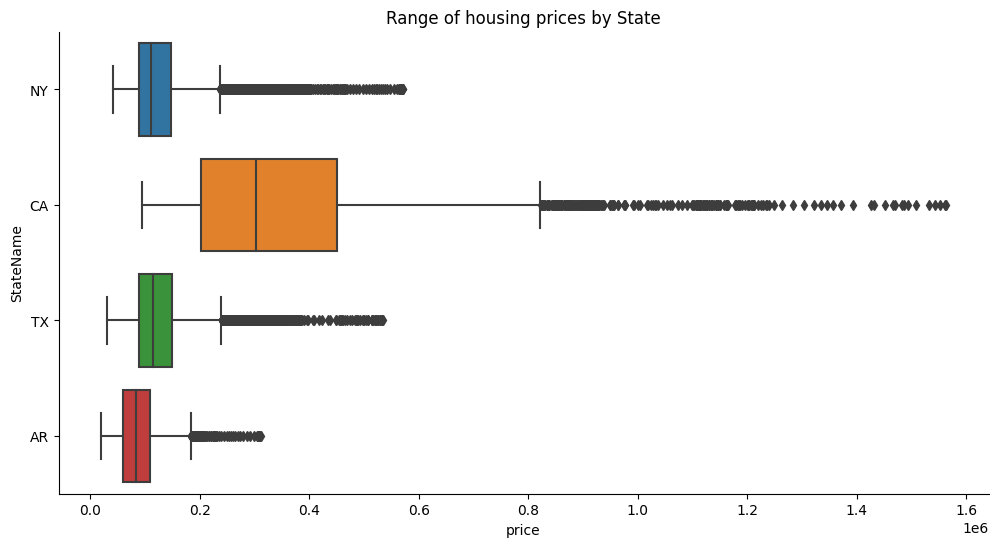

In [ ]:
plt.figure(figsize = (12,6))

sns.boxplot(x="price", y="StateName",
            data= housing_clean[housing_clean["StateName"].isin(["CA","TX","NY","AR"])])

plt.title("Range of housing prices by State")

sns.despine()

In [ ]:
housing_clean.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,price,year
1,394913,1,"New York, NY",msa,NY,2000-01-31,179016.8663,2000
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,225229.7510,2000
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,140260.9356,2000
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,128720.9575,2000
5,394692,5,"Houston, TX",msa,TX,2000-01-31,117733.8495,2000


### California housing prices by region

The Bay area housing prices are significantly more expensive than the other areas. The Bay area housing prices is \$1.3 million. 

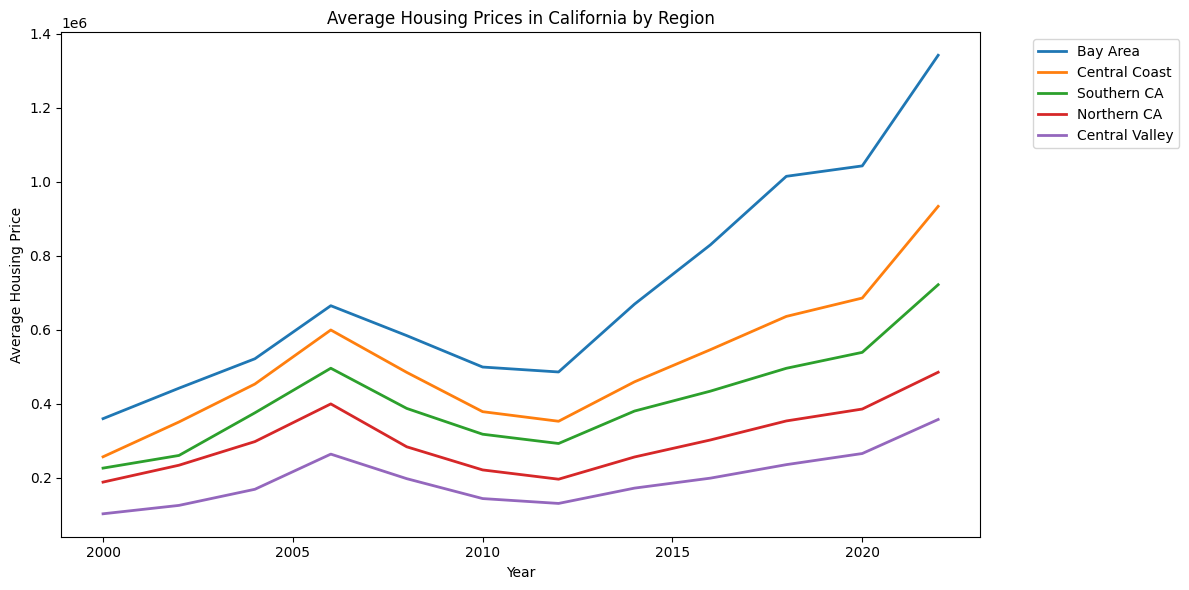

In [ ]:
years = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]
regions = list(set(city_to_region_CA.values()))

# Initializing a dictionary to store average prices by region and year
avg_prices_by_region = {region: [] for region in regions}

# Calculating the average prices
for year in years:
    # Filter the data for the current year
    df_year = housing_clean[(housing_clean["StateName"] == "CA") & (housing_clean['year'] == year)].copy()

    # Map each region to the city
    df_year['Region'] = df_year['RegionName'].map(city_to_region_CA)

    # Calculate the mean price for each region
    for region in regions:
        avg_prices_by_region[region].append(df_year[df_year['Region'] == region]['price'].mean())

# Plotting
fig, ax = plt.subplots(figsize=(12,6))  # Increase the width of the figure

# Line styles for better distinction
line_styles = ['-', '--', '-.', ':']

# Order regions by the last year's average price, from highest to lowest
sorted_regions = sorted(regions, key=lambda region: avg_prices_by_region[region][-1], reverse=True)

for i, region in enumerate(sorted_regions):
    ax.plot(years, avg_prices_by_region[region], label=region, linewidth=2)

ax.set_xlabel('Year')
ax.set_ylabel('Average Housing Price')
ax.set_title('Average Housing Prices in California by Region')

# Move the legend outside of the plot area
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Arkansas Housing prices 

This graph shows Arkansas housing prices by region. Northwest Arkansas is the highest priced region. The average house price in Northwest Arkansas in 2022 was \$300,000. 

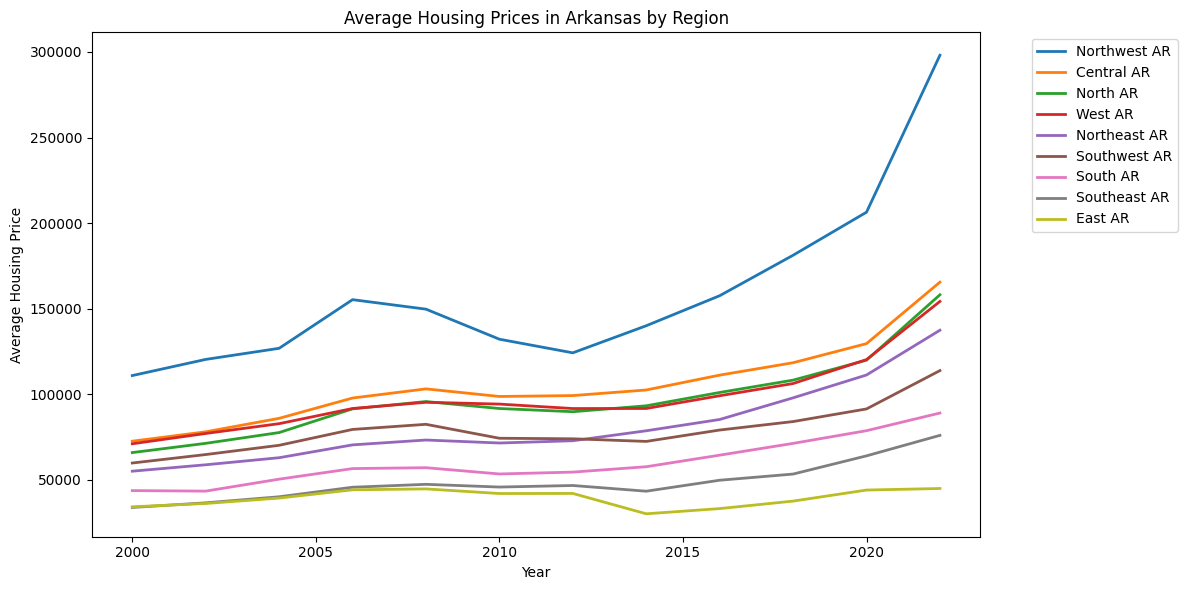

In [ ]:
years = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]
regions = list(set(city_to_region_AR.values()))

# Initializing a dictionary to store average prices by region and year
avg_prices_by_region = {region: [] for region in regions}

# Calculating the average prices
for year in years:
    # Filter the data for the current year
    df_year = housing_clean[(housing_clean["StateName"] == "AR") & (housing_clean['year'] == year)].copy()

    # Map each region to the city
    df_year['Region'] = df_year['RegionName'].map(city_to_region_AR)

    # Calculate the mean price for each region
    for region in regions:
        avg_prices_by_region[region].append(df_year[df_year['Region'] == region]['price'].mean())

# Plotting
fig, ax = plt.subplots(figsize=(12,6))  # Increase the width of the figure

# Line styles for better distinction
line_styles = ['-', '--', '-.', ':']

# Order regions by the last year's average price, from highest to lowest
sorted_regions = sorted(regions, key=lambda region: avg_prices_by_region[region][-1], reverse=True)

for i, region in enumerate(sorted_regions):
    ax.plot(years, avg_prices_by_region[region], label=region, linewidth=2)

ax.set_xlabel('Year')
ax.set_ylabel('Average Housing Price')
ax.set_title('Average Housing Prices in Arkansas by Region')

# Move the legend outside of the plot area
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

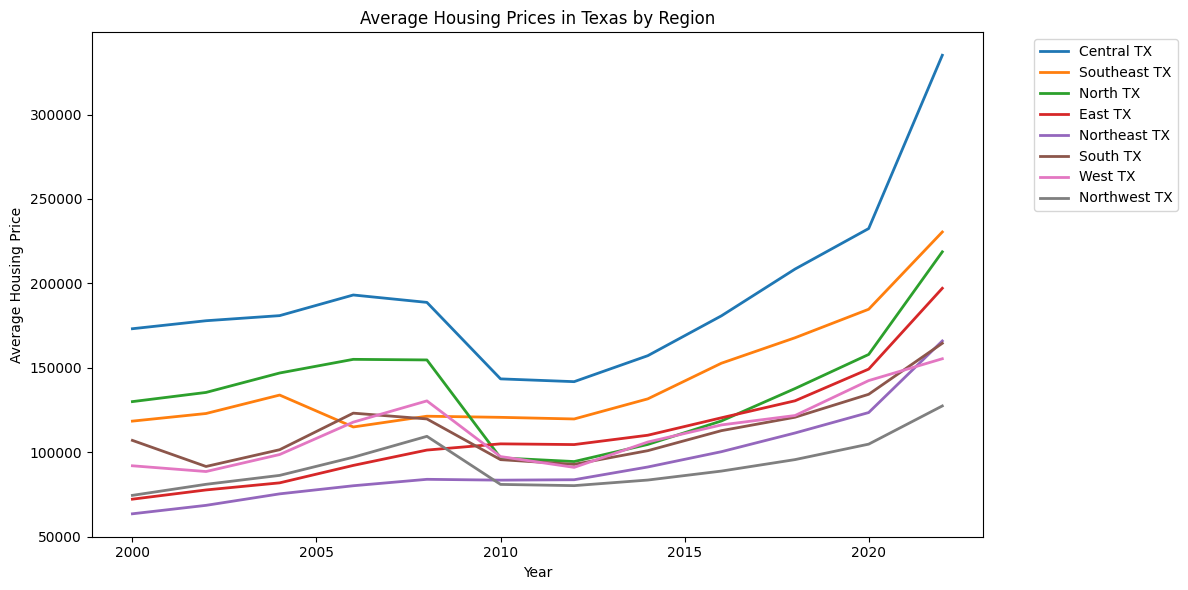

In [ ]:
years = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022]
regions = list(set(city_to_region_TX.values()))

# Initializing a dictionary to store average prices by region and year
avg_prices_by_region = {region: [] for region in regions}

# Calculating the average prices
for year in years:
    # Filter the data for the current year
    df_year = housing_clean[(housing_clean["StateName"] == "TX") & (housing_clean['year'] == year)].copy()

    # Map each region to the city
    df_year['Region'] = df_year['RegionName'].map(city_to_region_TX)

    # Calculate the mean price for each region
    for region in regions:
        avg_prices_by_region[region].append(df_year[df_year['Region'] == region]['price'].mean())

# Plotting
fig, ax = plt.subplots(figsize=(12,6))  # Increase the width of the figure

# Line styles for better distinction
line_styles = ['-', '--', '-.', ':']

# Order regions by the last year's average price, from highest to lowest
sorted_regions = sorted(regions, key=lambda region: avg_prices_by_region[region][-1], reverse=True)

for i, region in enumerate(sorted_regions):
    ax.plot(years, avg_prices_by_region[region], label=region, linewidth=2)

ax.set_xlabel('Year')
ax.set_ylabel('Average Housing Price')
ax.set_title('Average Housing Prices in Texas by Region')

# Move the legend outside of the plot area
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Summary of Zillow Housing prices 

This project analyzed housing prices in New York, California, Texas and Arkansas from 2000-2023. The dataset is pulled from Zillow. 
The highest housing cost by region is the Bay Area. In the Bay Area the average housing price is \$1.3 million dollars. The Texas and Arkansas area highest priced regions are around \$300,000. The New york City area is the highest priced region in New York at around \$580,000. Each state has an outlier region that is significantly higher prices than the other regions. 
